<a href="https://colab.research.google.com/github/kavithasub/uh-study-modules/blob/main/machine-learning/22097222_ML_model_evaluation_assignment_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
Data - Diabetes prediction dataset is  downloaded from kaggle which is a collection of medical and demographic data from patients.
### Problem:
Predict diabetes in patients. By building machine learning models diabetes can be predicatable based on patients medical history.

### Methodology:
Preprocess the data to get clear understand about the data and select models.
Apply different ML models -  Decision Trees, Random Forests, Logistic Regression, Support Vector Machines (SVMs) and K-Nearest Neighbours.
Evaluate the models and select best model.

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, learning_curve, LearningCurveDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay, classification_report, det_curve
from scipy.stats import randint


# Data loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sample_data/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Exploratory Data Analysis

In [ ]:
## Get value counts for each attributes
def get_value_counts(dataframe,col_list):
    for col in col_list:
        print(dataframe[col].value_counts())
        print('\n')

In [ ]:
get_value_counts(df,['gender','hypertension','heart_disease','smoking_history','diabetes'])

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


hypertension
0    92515
1     7485
Name: count, dtype: int64


heart_disease
0    96058
1     3942
Name: count, dtype: int64


smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


diabetes
0    91500
1     8500
Name: count, dtype: int64




In [ ]:
## Remove imbalanced class data
diabetesDF = df[df.gender != 'Other']
diabetesDF.gender.value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

### Plot few graphs to understand interelations of attributes

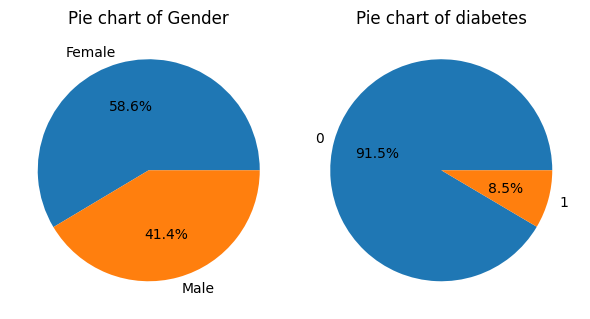

In [ ]:
## Draw pie chart for gender distribution and diabetes distribution
fig,axes = plt.subplots(1,2,figsize=(6,6))
axes[0].pie(diabetesDF['gender'].value_counts(),labels=diabetesDF['gender'].value_counts().index,autopct='%1.1f%%')
axes[0].set_title('Pie chart of Gender')
axes[1].pie(diabetesDF['diabetes'].value_counts(),labels=diabetesDF['diabetes'].value_counts().index, autopct='%1.1f%%')
axes[1].set_title('Pie chart of diabetes')
plt.tight_layout()
plt.show()

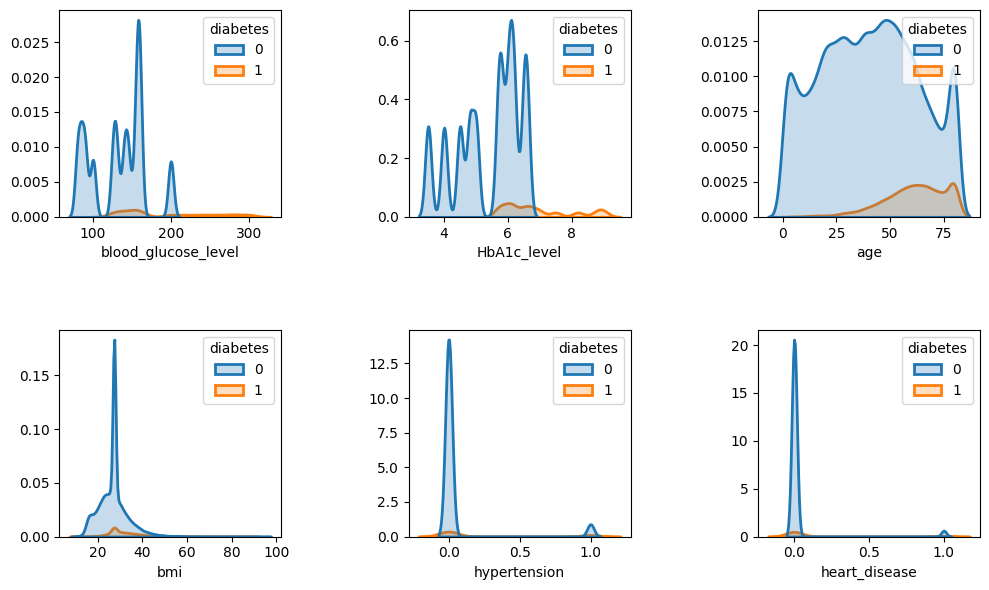

In [ ]:
## More plots to see distributions
select_cols = ['diabetes', 'blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'hypertension', 'heart_disease']

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
ax = ax.flatten()

for i, col in enumerate(diabetesDF[select_cols].columns[1:]):
    sns.kdeplot(x=col, data=diabetesDF, ax=ax[i], fill=True, lw=2, hue = 'diabetes')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('')

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

**Pie chart shows the gender is somewhat equally distributed but non-diabetes distribution is high.**

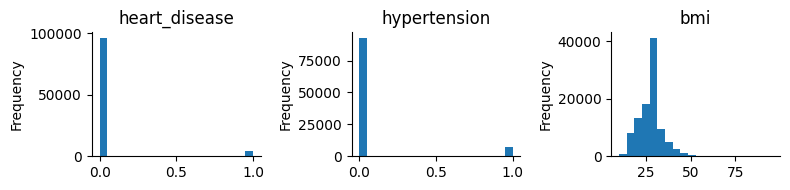

In [ ]:
## Draw histogram for heart disease, hypertension and bmi
fig,axes = plt.subplots(1,3,figsize=(8,2))

diabetesDF['heart_disease'].plot(kind='hist', bins=20, title='heart_disease', ax=axes[0])
axes[0].spines[['top', 'right',]].set_visible(False)
diabetesDF['hypertension'].plot(kind='hist', bins=20, title='hypertension', ax=axes[1])
axes[1].spines[['top', 'right',]].set_visible(False)
diabetesDF['bmi'].plot(kind='hist', bins=20, title='bmi', ax=axes[2])
axes[2].spines[['top', 'right',]].set_visible(False)

plt.tight_layout()
plt.show()

**According to histograms, the heart disease and hypertension are not having impact on diabetes patients whereas bmi is normally distributed.**

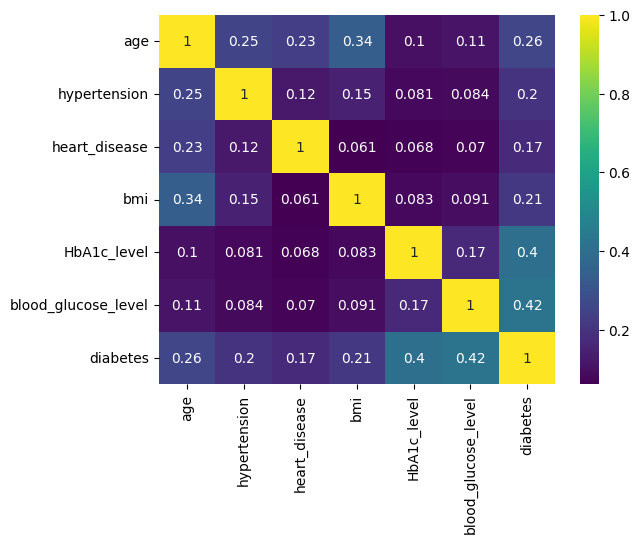

In [ ]:
## Find correlations between all attributes
diabetesDF2 = diabetesDF.copy()
df_heatmap = diabetesDF2.drop(['gender','smoking_history'],axis=1)
corr_diabetes = df_heatmap.corr()
sns.heatmap(corr_diabetes,annot=True, cmap='viridis')
plt.show()

**None of these indicators are having strong correlation with diabetes except blood glucose level indicator.**

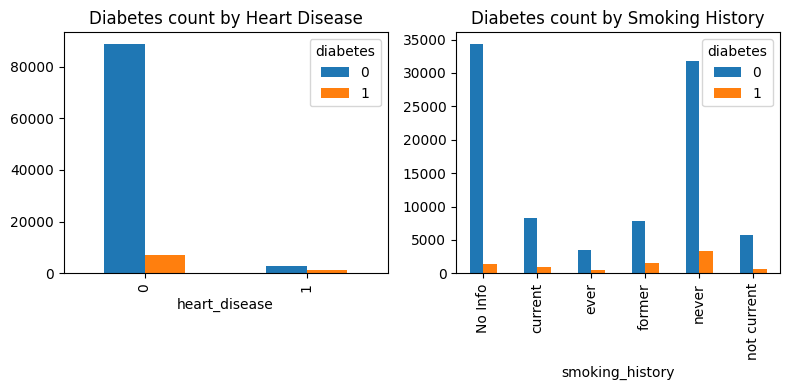

In [ ]:
## Find diabetes count by few indicators
df_heart = diabetesDF2.groupby(['heart_disease','diabetes']).size().unstack()
df_smoke = diabetesDF2.groupby(['smoking_history','diabetes']).size().unstack()

fig,axes = plt.subplots(1,2,figsize=(8,4))
df_heart.plot(kind='bar',ax=axes[0])
axes[0].set_title('Diabetes count by Heart Disease')
df_smoke.plot(kind='bar',ax=axes[1])
axes[1].set_title('Diabetes count by Smoking History')
plt.tight_layout()
plt.show()

**Above graph shows that diabetes does not have much impact by heart disease and smoking history indicators**

In [ ]:
## Add new columns for categorical values of blood glucose level, HbA level and age
age_bins = [0,30,60,float('inf')]
age_labels = ['Young','Middle','Old']
glu_bins = [0,140,200,float('inf')]
glu_labels = ['Normal','Medium','High']
hba_bins = [0,5.7,6.4,float('inf')]
hba_labels = ['Normal','Medium','High']
diabetesDF2['glu_cat'] = pd.cut(diabetesDF2['blood_glucose_level'],bins=glu_bins,labels=glu_labels)
diabetesDF2['hba_cat'] = pd.cut(diabetesDF2['HbA1c_level'],bins=hba_bins,labels=hba_labels)
diabetesDF2['age_cat'] = pd.cut(diabetesDF2['age'],bins=age_bins,labels=age_labels)
diabetesDF2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,glu_cat,hba_cat,age_cat
0,Female,80.0,0,1,never,25.19,6.6,140,0,Normal,High,Old
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Normal,High,Middle
2,Male,28.0,0,0,never,27.32,5.7,158,0,Medium,Normal,Young
3,Female,36.0,0,0,current,23.45,5.0,155,0,Medium,Normal,Middle
4,Male,76.0,1,1,current,20.14,4.8,155,0,Medium,Normal,Old


In [ ]:
## Get all diabetes patients group by few attributes
df_positive = diabetesDF2[diabetesDF2.diabetes == 1]
df_gender = df_positive.groupby(['gender']).size()
df_age = df_positive.groupby(['age_cat']).size()
df_glucose = df_positive.groupby(['glu_cat']).size()
df_hba = df_positive.groupby(['hba_cat']).size()

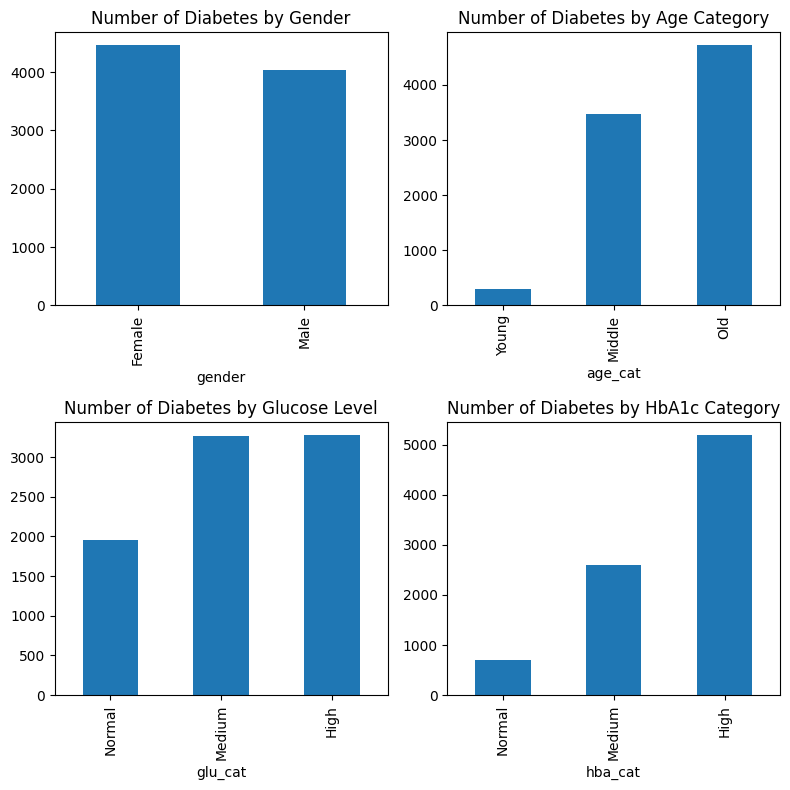

In [ ]:
## Draw histograms to get number of diabetes by few attributes
fig,axes = plt.subplots(2,2,figsize=(8,8))
df_gender.plot(kind='bar',ax=axes[0,0])
axes[0,0].set_title('Number of Diabetes by Gender')
df_age.plot(kind='bar',ax=axes[0,1])
axes[0,1].set_title('Number of Diabetes by Age Category')
df_glucose.plot(kind='bar',ax=axes[1,0])
axes[1,0].set_title('Number of Diabetes by Glucose Level')
df_hba.plot(kind='bar',ax=axes[1,1])
axes[1,1].set_title('Number of Diabetes by HbA1c Category')
plt.tight_layout()
plt.show()

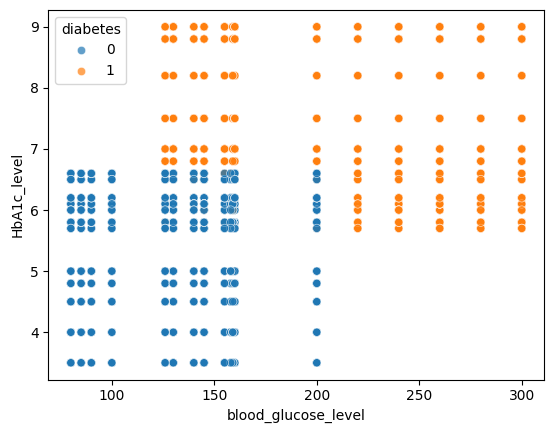

In [ ]:
## Scatter plot
sns.scatterplot(x='blood_glucose_level', y='HbA1c_level', data=diabetesDF, hue='diabetes', alpha=0.7);

**scatter plot shows, high blood glucose level and high HbA1c level having huge impact on diabetes positive**

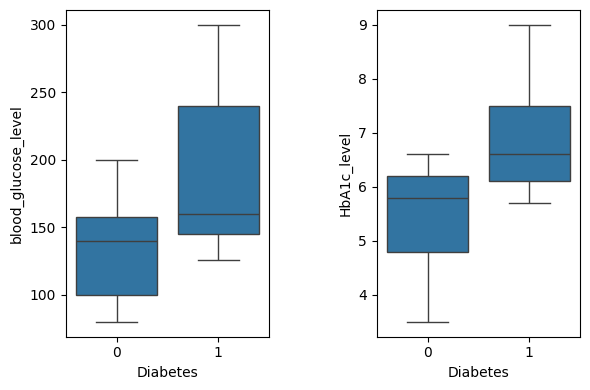

In [ ]:
# Find outliers
# Select high impact variables
relevant_variables = ['diabetes', 'blood_glucose_level', 'HbA1c_level']

fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax = ax.flatten()

for i, col in enumerate(diabetesDF[relevant_variables].columns[1:]):
    sns.boxplot(x='diabetes', y=col, data=diabetesDF, ax=ax[i])
    ax[i].set_xlabel('Diabetes')
    ax[i].set_ylabel(col)

plt.tight_layout(w_pad=5, h_pad=5)
plt.show()


# Data Preprocessing

#### Find for missing data
missing data can be removed if very less amount of data else it can be filled with mean values.

In [ ]:
diabetesDF.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**There is no missing values in this data set**

#### Data transformation

In [ ]:
## Encode values for categorical type attributes
category_cols = ["gender", "smoking_history"]

le = LabelEncoder()
for label in category_cols:
    diabetesDF[label] = le.fit_transform(diabetesDF[label])
diabetesDF.head()

<ipython-input-32-a3a1857a009a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetesDF[label] = le.fit_transform(diabetesDF[label])
<ipython-input-32-a3a1857a009a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetesDF[label] = le.fit_transform(diabetesDF[label])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


### Split the data into training and test subsets

In [ ]:
## Separate target variable from features
X = diabetesDF.iloc[:, :-1]
y = diabetesDF.iloc[:, -1]

In [ ]:
## trin and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

#### apply standard scaler to transform data to same structure

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model definition, Training and Prediction

### 1. Decision Tree Classifier

In [ ]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtc_model.score(X_train, y_train)

0.9992123523160593

In [ ]:
dtc_pred = dtc_model.predict(X_test)

In [ ]:
## find accuracy on test set
dtc_acc = accuracy_score(y_test, dtc_pred)
dtc_rec = recall_score(y_test, dtc_pred)
dtc_prec = precision_score(y_test, dtc_pred)
print('Accuracy score of Logistic Regression on Test: ', dtc_acc)
print('Recall score of Logistic Regression: ', dtc_rec)
print('Precision score of Logistic Regression: ', dtc_prec)

Accuracy score of Logistic Regression on Test:  0.9526428964344652
Recall score of Logistic Regression:  0.7540887850467289
Precision score of Logistic Regression:  0.7105118326912493


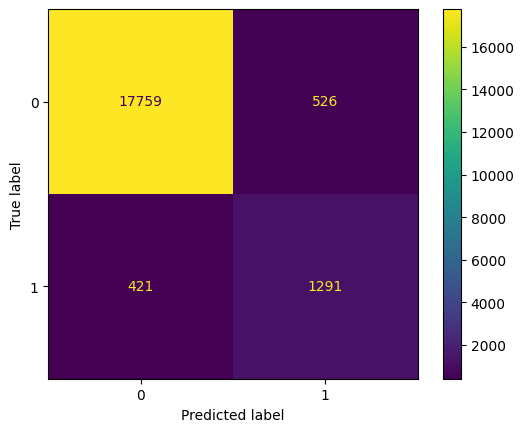

In [ ]:
ConfusionMatrixDisplay.from_estimator(dtc_model , X_test , y_test);

######Logistic Regression

In [ ]:
## Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr_model.score(X_train, y_train)

0.9603800712633619

In [ ]:
lr_pred = lr_model.predict(X_test)

In [ ]:
## find accuracy on test set
lr_acc = accuracy_score(y_test, lr_pred)
lr_rec = recall_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred)
print('Accuracy score of Logistic Regression on Test: ', lr_acc)
print('Recall score of Logistic Regression: ', lr_rec)
print('Precision score of Logistic Regression: ', lr_prec)

Accuracy score of Logistic Regression on Test:  0.959093864079612
Recall score of Logistic Regression:  0.6366822429906542
Precision score of Logistic Regression:  0.8475894245723172


### 2. Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
rf_score = rf_model.score(X_train , y_train)

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
## find accuracy on test set
rf_acc = accuracy_score(y_test , rf_pred)
rf_rec = recall_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
print('Accuracy score of Random Forest Classifier on Test: ', rf_acc)
print('Recall score of Random Forest Classifier: ', rf_rec)
print('Precision score of Random Forest Classifier: ', rf_prec)

Accuracy score of Random Forest Classifier on Test:  0.9697954693203981
Recall score of Random Forest Classifier:  0.6927570093457944
Precision score of Random Forest Classifier:  0.9382911392405063


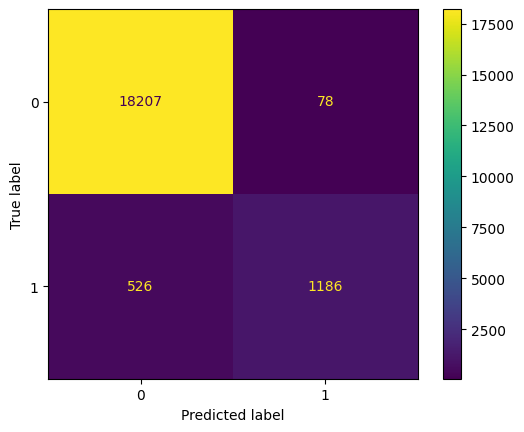

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_model , X_test , y_test);

### 3. Support Vector Classifier

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
svc_model.score(X_train , y_train)

0.96446833781334

In [ ]:
svc_pred = svc_model.predict(X_test)

In [ ]:
## find accuracy on test set
svc_acc = accuracy_score(y_test , svc_pred)
svc_rec = recall_score(y_test, svc_pred)
svc_prec = precision_score(y_test, svc_pred)
print('Accuracy score of SVC on Test: ', svc_acc)
print('Recall score of SVC: ', svc_rec)
print('Precision score of SVCr: ', svc_prec)

Accuracy score of SVC on Test:  0.9634945241786268
Recall score of SVC:  0.5940420560747663
Precision score of SVCr:  0.9667300380228137


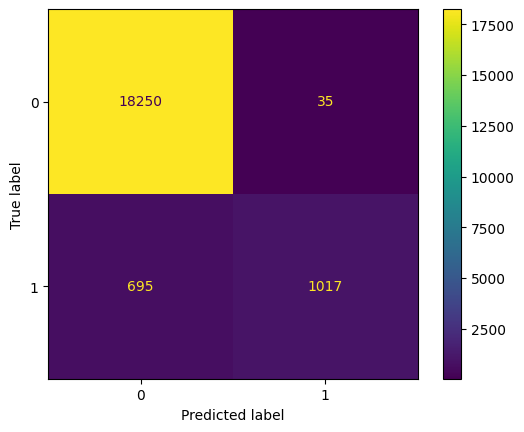

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_model , X_test , y_test);

### 4. K-Nearest Neighbours

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model.score(X_train , y_train)

0.9737325748577859

In [ ]:
knn_pred = knn_model.predict(X_test)

In [ ]:
## find accuracy on test set
knn_acc = accuracy_score(y_test , knn_pred)
knn_rec = recall_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred)
print('Accuracy score of KNN on Test: ', knn_acc)
print('Recall score of KNN: ', knn_rec)
print('Precision score of KNN: ', knn_prec)

Accuracy score of KNN on Test:  0.9591438715807371
Recall score of KNN:  0.6501168224299065
Precision score of KNN:  0.836213373403456


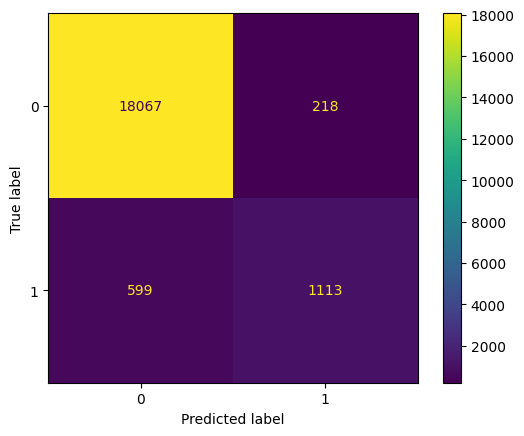

In [ ]:
ConfusionMatrixDisplay.from_estimator(knn_model , X_test , y_test);

# Evaluate the model

### Score summary of models

In [ ]:
## Display as table
scores = pd.DataFrame(columns = ["DTC", "RFC", "SVC", "KNN"],
                     index = ["ACC", "REC", "PREC"])
acc = [dtc_acc, rf_acc, svc_acc, knn_acc]
scores.iloc[0, :] = acc
rec = [dtc_rec, rf_rec, svc_rec, knn_rec]
scores.iloc[1, :] = rec
prec = [dtc_prec, rf_prec, svc_prec, knn_prec]
scores.iloc[2, :] = prec
scores

,DTC,RFC,SVC,KNN
ACC,0.952643,0.969795,0.963495,0.959144
REC,0.754089,0.692757,0.594042,0.650117
PREC,0.710512,0.938291,0.96673,0.836213


**Comparatively the accuracy and recall are high for Random forest model whereas the precision is somewhat high.**

**Model selected is Random Forest based on accuracy on test and recall values.**

#### Analyse performance of RF model

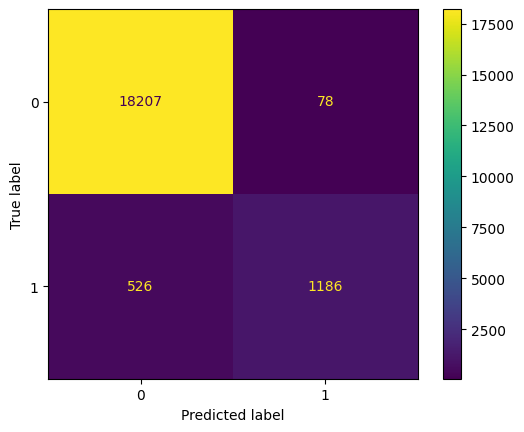

In [ ]:
## Print confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model , X_test , y_test);

In [ ]:
print(classification_report(y_test , rf_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18285
           1       0.94      0.69      0.80      1712

    accuracy                           0.97     19997
   macro avg       0.96      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



**According to confusion matrix, the number of healthy people incorrectly predicted as having diabetes(false positive) is very less.**

**Number of actual diabetes patients classified as non-diabetes(false negative) is somewhat high.**

**This false positive number indicates low recall and high precision.**

#### Further, can try randomized hyperparameter search to proof this is best model

In [ ]:
# Define the parameters for grid search
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,30)}

rf_model2 = RandomForestClassifier()


rand_search = RandomizedSearchCV(rf_model2, param_distributions = param_dist, n_iter=7)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=7,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e6bf3c6e1d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e6bf3c6dcc0>})

In [ ]:
best_model = rand_search.best_estimator_

In [ ]:
rf_pred2 = best_model.predict(X_test)

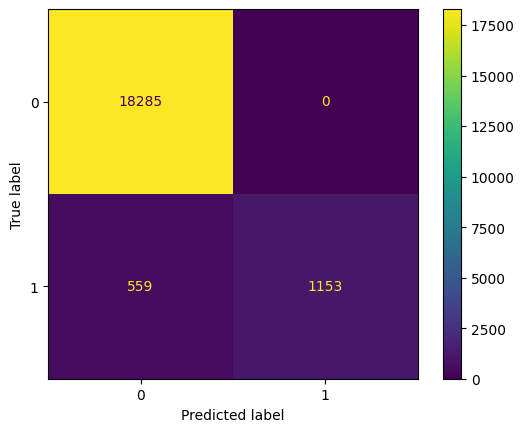

In [ ]:
## Print confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model , X_test , y_test);

In [ ]:
## Print classification report
print(classification_report(y_test , rf_pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18285
           1       1.00      0.67      0.80      1712

    accuracy                           0.97     19997
   macro avg       0.98      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



**with hyperparameter search technique, model improved as we can see false positive rate becomes zero. Also precision value increased.**

#### feature importance


Random Forest Feature Importance:


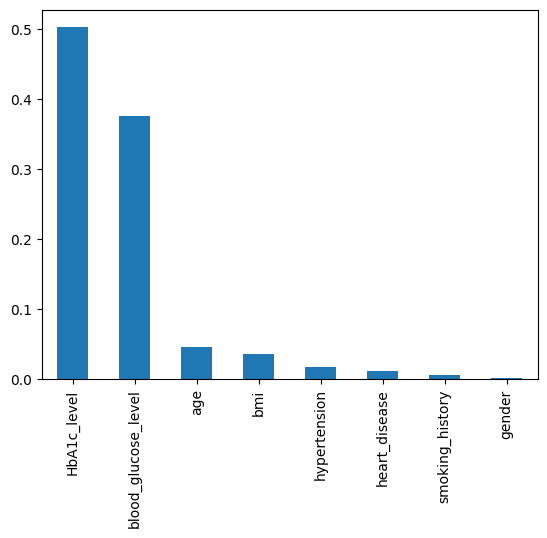

In [ ]:
# Find feature importance for Random Forest classifier
if hasattr(best_model, 'feature_importances_'):
    feature_importance_rf = pd.Series(best_model.feature_importances_,
                                      index=X.columns).sort_values(ascending=False)
    print("\nRandom Forest Feature Importance:")
    #print(feature_importance_rf)
    feature_importance_rf.plot.bar()

#### Learning curve

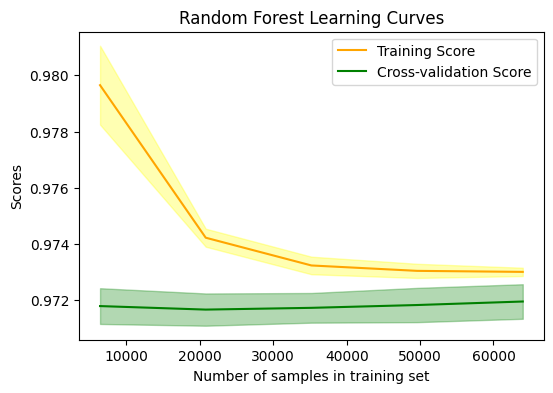

In [ ]:
## Generate the data needed to plot a learning curve
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(best_model, X_train, y_train, cv=5)
train_mean_rf = np.mean(train_scores_rf, axis=1)
train_std_rf = np.std(train_scores_rf, axis=1)
test_mean_rf = np.mean(test_scores_rf, axis=1)
test_std_rf = np.std(test_scores_rf, axis=1)

## plot learning curve
plt.figure(figsize=(6, 4))
plt.plot(train_sizes_rf, train_mean_rf, label='Training Score', color='orange')
plt.fill_between(train_sizes_rf, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, color='yellow', alpha=0.3)
plt.plot(train_sizes_rf, test_mean_rf, label='Cross-validation Score', color='green')
plt.fill_between(train_sizes_rf, test_mean_rf - test_std_rf, test_mean_rf + test_std_rf, color='green', alpha=0.3)
plt.title('Random Forest Learning Curves')
plt.xlabel('Number of samples in training set')
plt.ylabel('Scores')
plt.legend()
plt.show()

**The training score reduced to a low value with increasing size of the training set**

#### ROC curve

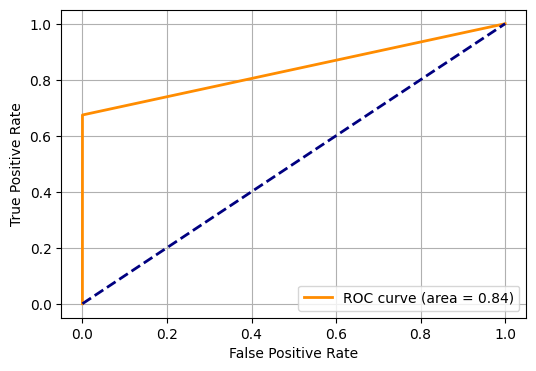

In [ ]:
## Plot ROC curve using false positive and true positive rates
plt.figure(figsize = (6, 4))
from sklearn.metrics import roc_curve, auc
FPR, TPR, thresholds = roc_curve(y_test, rf_pred2)
roc_auc = auc(FPR,TPR)
plt.plot(FPR, TPR, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Area under the ROC (AUC) is 0.84. According to the rule, it is good band for selected model.**